# Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
tf.__version__

'2.5.0'

# Creating dataset

In [4]:
from sklearn.datasets import make_circles

In [5]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)
# X : x, y coordinates of points
# y : labels (0, 1)

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

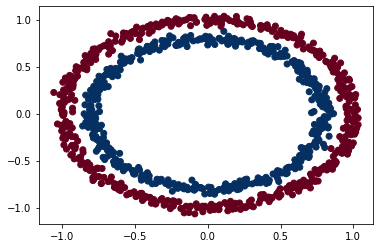

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.show()

# Input, output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

# Creating the model

In [68]:
tf.random.set_seed(42)

In [86]:
classifier = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(2),
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
    ]
)

In [89]:
classifier.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

In [90]:
history = classifier.fit(X, y, epochs=250, verbose=1)

Epoch 1/250
32/32 [==============================] - 2s 2ms/step - loss: 0.7008 - accuracy: 0.4940
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.4860
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.4700
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4560
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4390
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4390
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4760
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4540
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.4430
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4740
Epoch 11/

In [91]:
classifier.predict([[0, 0]])

array([[1.]], dtype=float32)

In [92]:
classifier.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 1.0000


[0.02400226891040802, 1.0]

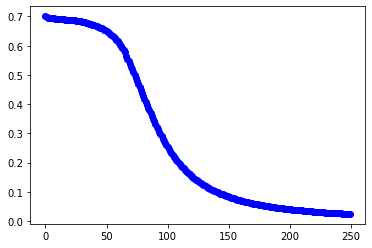

In [93]:
plt.plot(history.history['loss'], 'bo:')
plt.show()

In [94]:

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function was inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb 
    """
    
    steps = 100

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps),
                        np.linspace(y_min, y_max, steps))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


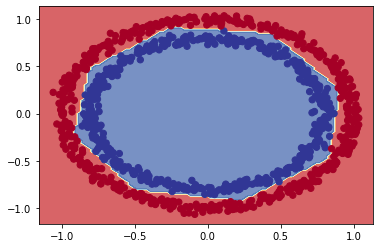

In [95]:
plot_decision_boundary(classifier, X, y)